In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [53]:
# Can download the science_comp_1_4.csv, science_comp_1_5.csv, and science_comp_1_6.csv files at 
# https://epyc.astro.washington.edu/~lynnej/opsim_downloads/

In [17]:
release = ['1.4', '1.5', '1.6']
sci = {}
for r in release:
    sci[r] = pd.read_csv(os.path.join('science_comp', f'sci_summary_{r.replace(".", "_")}.csv'), index_col=0)

In [18]:
sci['1.6']

,fOArea fO All visits HealpixSlicer,fOArea/benchmark fO All visits HealpixSlicer,fONv MedianNvis fO All visits HealpixSlicer,fONv MinNvis fO All visits HealpixSlicer,fONv/benchmark MedianNvis fO All visits HealpixSlicer,fONv/benchmark MinNvis fO All visits HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 22.4 All visits HealpixSlicer,95th Percentile Parallax Error Parallax Error @ 22.4 All visits HealpixSlicer,Mean Parallax Error @ 22.4 All visits HealpixSlicer,Rms Parallax Error @ 22.4 All visits HealpixSlicer,...,N(-3Sigma) Kuiper rotTelPos i HealpixSlicer,N stars to Precision 0.20 i HealpixSlicer,Nstars_no_crowding i HealpixSlicer,"DD:ELAISS1, i i band UserPointsSlicer","DD:XMM-LSS, i i band UserPointsSlicer","DD:ECDFS, i i band UserPointsSlicer","DD:COSMOS, i i band UserPointsSlicer","DD:EDFS, i i band UserPointsSlicer","DD:EDFSa, i i band UserPointsSlicer","DD:EDFSb, i i band UserPointsSlicer"
barebones_nexp2_v1.6_10yrs,18405.709639,1.022539,1067.0,990.0,1.293333,1.200000,2.074872,4.292548,2.751396,7.057977,...,225.0,2.046451e+09,2.968818e+09,27.787946,27.735247,27.757558,27.679842,26.471835,27.640052,27.630016
barebones_v1.6_10yrs,18518.174988,1.028787,1155.0,1074.0,1.400000,1.301818,1.912236,4.015585,2.485906,4.506423,...,208.0,2.012022e+09,2.987534e+09,27.853476,27.782984,27.828071,27.734514,26.536307,27.669529,27.664861
baseline_nexp1_v1.6_10yrs,18210.154220,1.011675,972.0,902.0,1.178182,1.093333,2.098163,9.594737,4.320048,14.024941,...,161.0,2.982077e+09,7.505783e+09,28.218493,28.141530,28.207432,28.072571,26.457093,28.000890,28.011034
baseline_nexp2_scaleddown_v1.6_10yrs,18138.814260,1.007712,925.0,859.0,1.121212,1.041212,2.227324,12.756716,5.276680,21.276507,...,181.0,2.881798e+09,7.376737e+09,28.164921,28.062641,28.115651,28.016092,26.421592,27.914181,27.930600
baseline_nexp2_v1.6_10yrs,18044.813372,1.002490,897.0,831.0,1.087273,1.007273,2.288798,10.024083,4.680293,14.304137,...,174.0,2.894661e+09,7.416746e+09,28.136981,28.068423,28.122575,28.013937,26.380653,27.939998,27.945456
combo_dust_nexp2_v1.6_10yrs,7022.369929,0.390132,817.0,777.0,0.990303,0.941818,2.432036,15.774818,5.678524,14.785819,...,237.0,3.080168e+09,8.232147e+09,28.145556,28.059540,28.126130,27.998099,26.309636,27.933120,27.937387
combo_dust_v1.6_10yrs,19157.716746,1.064318,885.0,843.0,1.072727,1.021818,2.235913,15.471573,5.235602,9.482924,...,257.0,3.124770e+09,8.308566e+09,28.228711,28.127681,28.200457,28.082782,26.372980,27.971862,27.977338
ddf_heavy_nexp2_v1.6_10yrs,5404.211782,0.300234,810.0,743.0,0.981818,0.900606,2.503531,10.731679,5.062820,19.762130,...,179.0,2.909796e+09,7.313272e+09,28.742827,28.668832,28.799426,28.629347,26.312147,28.565988,28.576056
ddf_heavy_v1.6_10yrs,17677.202755,0.982067,881.0,810.0,1.067879,0.981818,2.294607,10.121970,4.629814,15.185568,...,173.0,2.862311e+09,7.422970e+09,28.795481,28.702746,28.883632,28.697292,26.364826,28.643222,28.644868
dm_heavy_nexp2_v1.6_10yrs,18076.706531,1.004261,899.0,833.0,1.089697,1.009697,2.405155,10.316434,4.743157,16.473454,...,236.0,2.944108e+09,7.576390e+09,27.948738,27.866996,27.904951,27.817456,26.396238,27.753203,27.764855


In [48]:
intranight_families = [
 'baseline_2snaps_v1.5_10yrs', 'baseline_2snapsv1.4_10yrs',
 'baseline_v1.5_10yrs', 
 'baseline_samefilt_v1.5_10yrs',
 'third_obs_pt15v1.5_10yrs', 'third_obs_pt15v1.4_10yrs',
 'third_obs_pt30v1.5_10yrs', 'third_obs_pt30v1.4_10yrs',
 'third_obs_pt45v1.5_10yrs', 'third_obs_pt45v1.4_10yrs',
 'third_obs_pt60v1.5_10yrs', 'third_obs_pt60v1.4_10yrs',
 'third_obs_pt90v1.5_10yrs',  'third_obs_pt90v1.4_10yrs',
 'third_obs_pt120v1.5_10yrs',  'third_obs_pt120v1.4_10yrs']
intranight_baseline = 'baseline_v1.5_10yrs'

footprint_families = ['bulges_bs_v1.5_10yrs',
 'bulges_bulge_wfd_v1.5_10yrs',
 'bulges_cadence_bs_v1.5_10yrs',
 'bulges_cadence_bulge_wfd_v1.5_10yrs',
 'bulges_cadence_i_heavy_v1.5_10yrs',
 'bulges_i_heavy_v1.5_10yrs',
 'filterdist_indx1_v1.5_10yrs',
 'filterdist_indx2_v1.5_10yrs',
 'filterdist_indx3_v1.5_10yrs',
 'filterdist_indx4_v1.5_10yrs',
 'filterdist_indx5_v1.5_10yrs',
 'filterdist_indx6_v1.5_10yrs',
 'filterdist_indx7_v1.5_10yrs',
 'filterdist_indx8_v1.5_10yrs',
 'footprint_add_mag_cloudsv1.5_10yrs',
 'footprint_big_sky_dustv1.5_10yrs',
 'footprint_big_sky_nouiyv1.5_10yrs',
 'footprint_big_skyv1.5_10yrs',
 'footprint_big_wfdv1.5_10yrs',
 'footprint_bluer_footprintv1.5_10yrs',
 'footprint_gp_smoothv1.5_10yrs',
 'footprint_newAv1.5_10yrs',
 'footprint_newBv1.5_10yrs',
 'footprint_no_gp_northv1.5_10yrs',
 'footprint_standard_goalsv1.5_10yrs',
 'baseline_v1.5_10yrs']
footprint_baseline = 'baseline_v1.5_10yrs'

rolling_families = ['rolling_fpo_2nslice0.8_v1.6_10yrs',
 'rolling_fpo_2nslice0.9_v1.6_10yrs',
 'rolling_fpo_2nslice1.0_v1.6_10yrs',
 'rolling_fpo_3nslice0.8_v1.6_10yrs',
 'rolling_fpo_3nslice0.9_v1.6_10yrs',
 'rolling_fpo_3nslice1.0_v1.6_10yrs',
 'rolling_fpo_6nslice0.8_v1.6_10yrs',
 'rolling_fpo_6nslice0.9_v1.6_10yrs',
 'rolling_fpo_6nslice1.0_v1.6_10yrs',
 'baseline_nexp1_v1.6_10yrs']
rolling_baseline = 'baseline_nexp1_v1.6_10yrs'

twilight_families = ['twilight_neo_mod1_v1.5_10yrs',
 'twilight_neo_mod2_v1.5_10yrs',
 'twilight_neo_mod3_v1.5_10yrs',
 'twilight_neo_mod4_v1.5_10yrs',
 'baseline_v1.5_10yrs']
twilight_baseline = 'baseline_v1.5_10yrs'

u_pairs_families = ['uparis_illum_15_scale1v1.4_10yrs',
 'uparis_illum_15_scale2v1.4_10yrs',
 'uparis_illum_15_scale4v1.4_10yrs',
 'uparis_illum_30_scale1v1.4_10yrs',
 'uparis_illum_30_scale2v1.4_10yrs',
 'uparis_illum_30_scale4v1.4_10yrs',
 'uparis_illum_40_scale1v1.4_10yrs',
 'uparis_illum_40_scale2v1.4_10yrs',
 'uparis_illum_40_scale4v1.4_10yrs',
 'uparis_illum_60_scale1v1.4_10yrs',
 'uparis_illum_60_scale2v1.4_10yrs',
 'uparis_illum_60_scale4v1.4_10yrs',
 'baseline_1.4_10yrs']
u_pairs_baseline = 'baseline_v1.4_10yrs'

filter_load_family = ['filter_load_illum15_v1.4_10yrs',
 'filter_load_illum10_v1.4_10yrs',
 'filter_load_illum20_v1.4_10yrs',
 'filter_load_illum30_v1.4_10yrs',
 'filter_load_illum45_v1.4_10yrs',
 'filter_load_illum5_v1.4_10yrs',
 'filter_load_illum60_v1.4_10yrs',
 'baseline_v1.4_10yrs']
filter_load_baseline = 'baseline_v1.4_10yrs'

# There are other families as well, but these were the ones I separated out so far. (DCR, short_exp, etc. are others)

In [20]:
# May as well look at the TDE results across ALL runs first.

cols = [c for c in sci['1.5'].columns.values if 'TDE' in c]
print(cols)

['TDEsPopMetric__prepeak  UserPointsSlicer', 'TDEsPopMetric__some_color  UserPointsSlicer', 'TDEsPopMetric__some_color_pu  UserPointsSlicer']


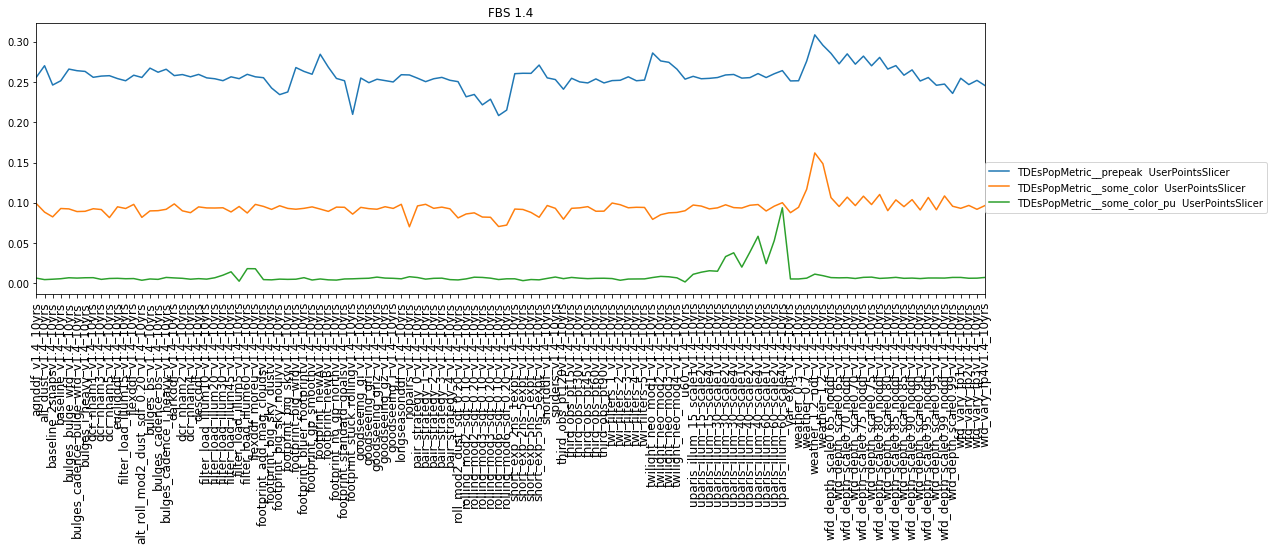

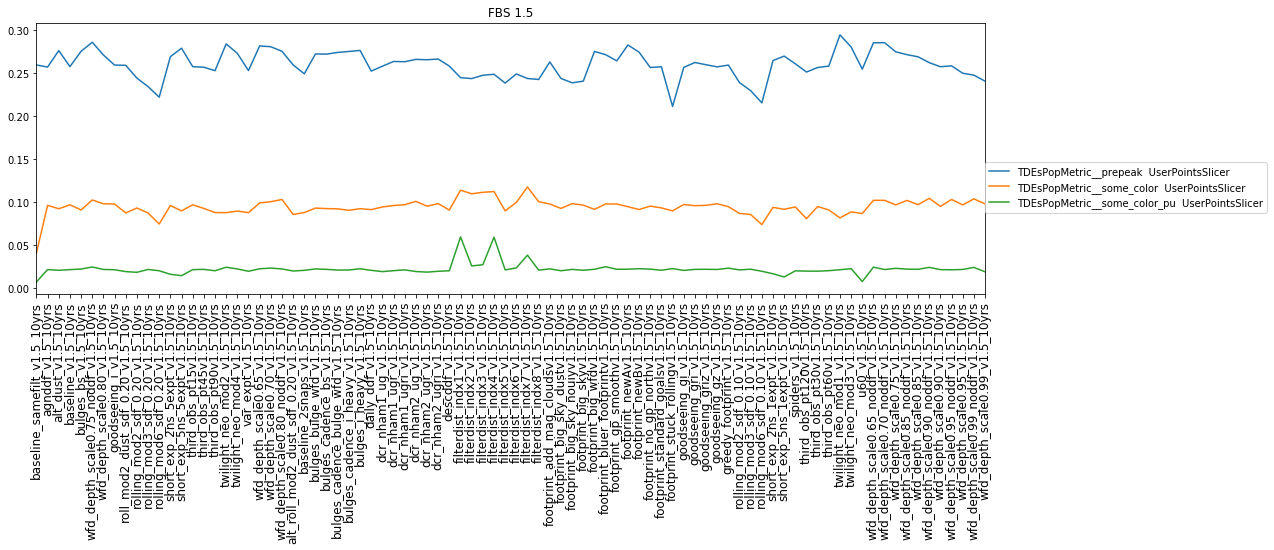

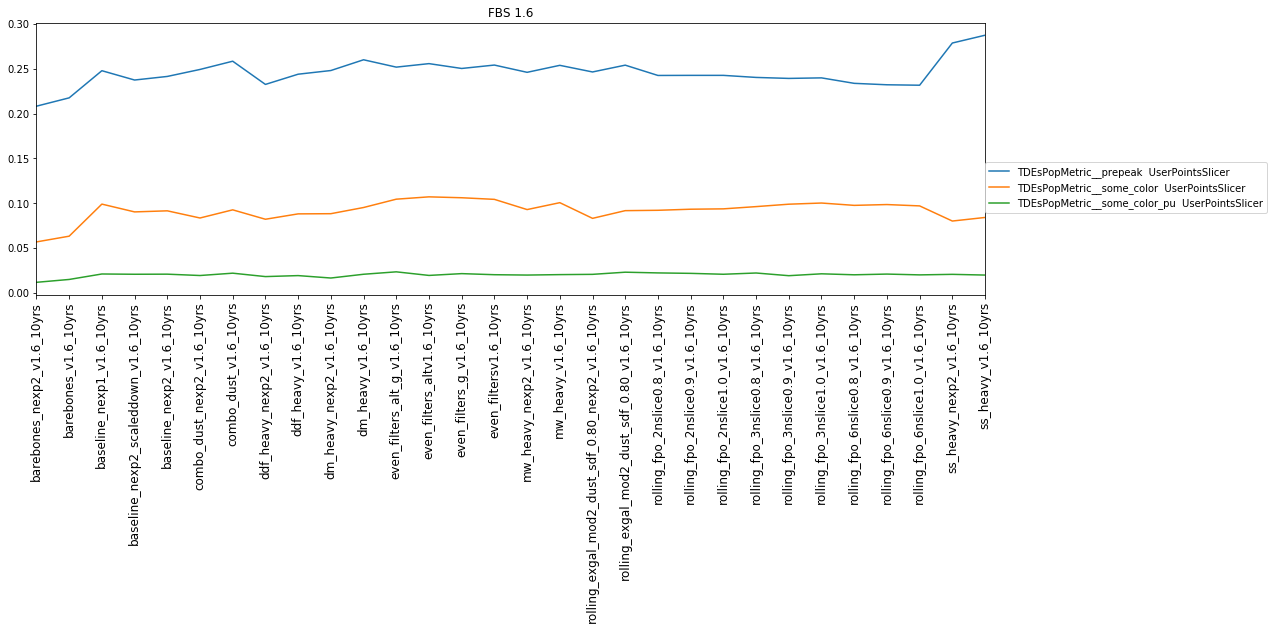

In [21]:
for r in sci:
    sci[r][cols].plot(figsize=(17,5))
    plt.legend(loc=(1, .3))
    xnames = sci[r][cols].index.values
    xi = np.arange(len(xnames))
    plt.xticks(xi, xnames, rotation=90, fontsize='large')
    plt.title(f'FBS {r}')

In [23]:
# ok - assuming that the "some_color_pu" is the most important metric 
# (this is the fraction of the population which was detected with a color in u band)
# We can see that there are some runs which are more interesting than others. 

# Perhaps not unsurprisingly, they are the runs with u-band filter pairing loading varied .. the 'u_pairs' runs. 
# Let's pull those out for more investigation. (from the FBS 1.4 set)

# But perhaps somewhat surprisingly, the *time* of the u-band filter swap isn't a big factor (the filter_load family).

In [34]:
u_pairs_family = [r for r in sci['1.4'].index.values if 'uparis' in r]  # unfortunate(?) typo
u_pairs_baseline = 'baseline_v1.4_10yrs'
u_pairs_family.append(u_pairs_baseline)
u_pairs_family

['uparis_illum_15_scale1v1.4_10yrs',
 'uparis_illum_15_scale2v1.4_10yrs',
 'uparis_illum_15_scale4v1.4_10yrs',
 'uparis_illum_30_scale1v1.4_10yrs',
 'uparis_illum_30_scale2v1.4_10yrs',
 'uparis_illum_30_scale4v1.4_10yrs',
 'uparis_illum_40_scale1v1.4_10yrs',
 'uparis_illum_40_scale2v1.4_10yrs',
 'uparis_illum_40_scale4v1.4_10yrs',
 'uparis_illum_60_scale1v1.4_10yrs',
 'uparis_illum_60_scale2v1.4_10yrs',
 'uparis_illum_60_scale4v1.4_10yrs',
 'baseline_v1.4_10yrs']

In [37]:
stats = sci['1.4'].loc[u_pairs_family]
stats[cols]

,TDEsPopMetric__prepeak UserPointsSlicer,TDEsPopMetric__some_color UserPointsSlicer,TDEsPopMetric__some_color_pu UserPointsSlicer
uparis_illum_15_scale1v1.4_10yrs,0.2570,0.0972,0.0112
uparis_illum_15_scale2v1.4_10yrs,0.2540,0.0959,0.0138
uparis_illum_15_scale4v1.4_10yrs,0.2545,0.0924,0.0156
uparis_illum_30_scale1v1.4_10yrs,0.2555,0.0937,0.0150
uparis_illum_30_scale2v1.4_10yrs,0.2587,0.0975,0.0332
uparis_illum_30_scale4v1.4_10yrs,0.2593,0.0940,0.0379
uparis_illum_40_scale1v1.4_10yrs,0.2548,0.0935,0.0201
uparis_illum_40_scale2v1.4_10yrs,0.2554,0.0969,0.0388
uparis_illum_40_scale4v1.4_10yrs,0.2604,0.0978,0.0584
uparis_illum_60_scale1v1.4_10yrs,0.2555,0.0898,0.0244


Text(0.5, 1.0, 'TDE metrics for u_pairs family')

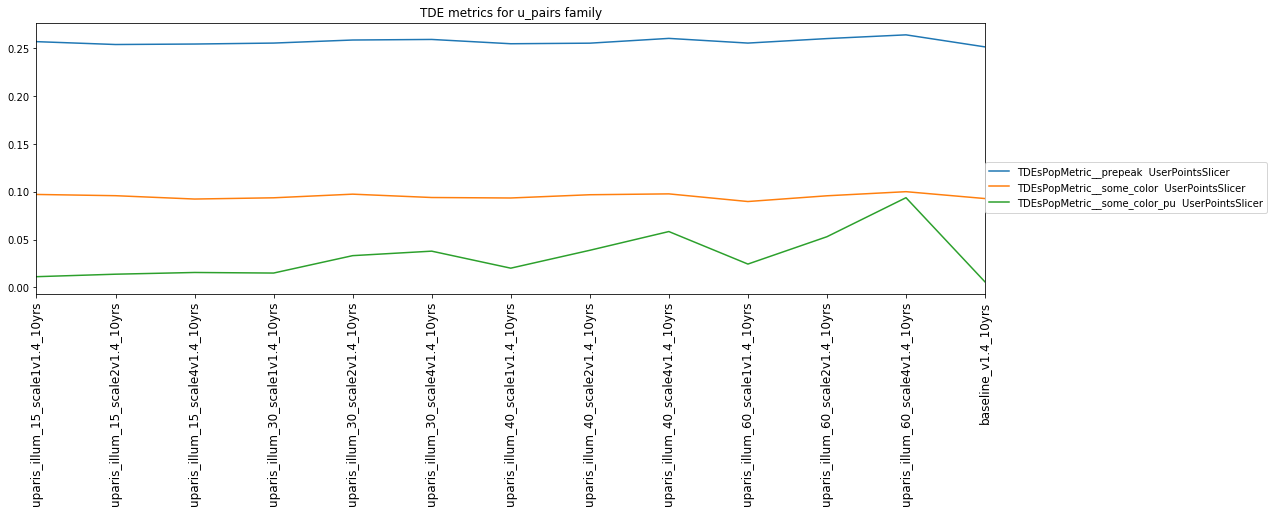

In [38]:
stats[cols].plot(figsize=(17,5))
plt.legend(loc=(1, .3))
xnames = stats[cols].index.values
xi = np.arange(len(xnames))
plt.xticks(xi, xnames, rotation=90, fontsize='large')
plt.title(f'TDE metrics for u_pairs family')

Text(0.5, 1.0, 'Relative change (%) TDE metrics for u_pairs family')

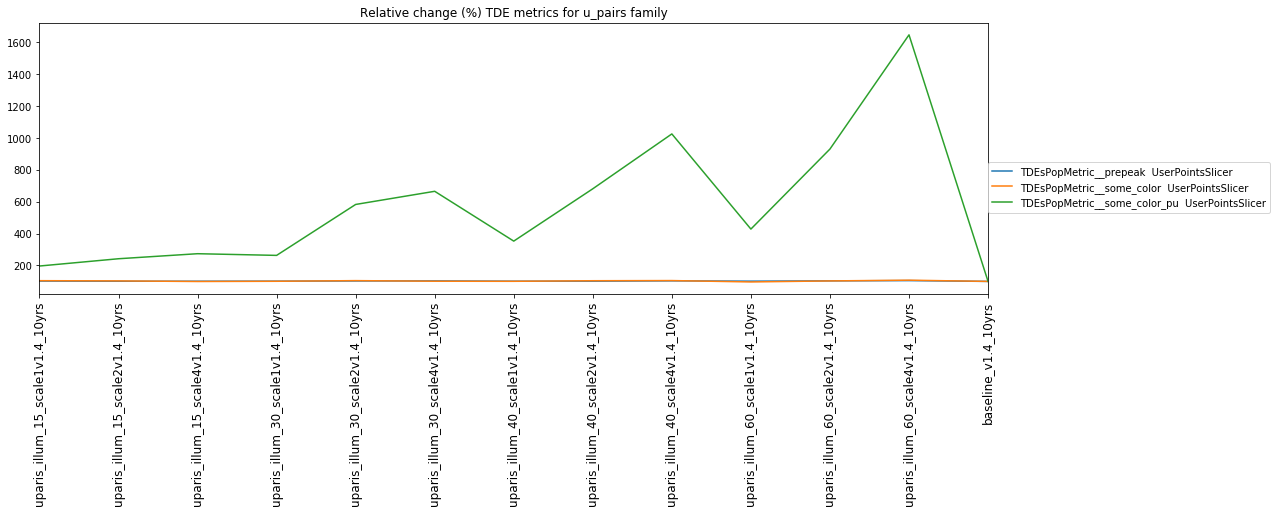

In [43]:
stats = sci['1.4'].loc[u_pairs_family] / sci['1.4'].loc[u_pairs_baseline] * 100
stats[cols].plot(figsize=(17,5))
plt.legend(loc=(1, .3))
xnames = stats[cols].index.values
xi = np.arange(len(xnames))
plt.xticks(xi, xnames, rotation=90, fontsize='large')
plt.title(f'Relative change (%) TDE metrics for u_pairs family')

In [47]:
filter_load_family = [r for r in sci['1.4'].index.values if 'filter_load' in r]
filter_load_baseline = 'baseline_v1.4_10yrs'
filter_load_family.append(filter_load_baseline)
filter_load_family

['filter_load_illum15_v1.4_10yrs',
 'filter_load_illum10_v1.4_10yrs',
 'filter_load_illum20_v1.4_10yrs',
 'filter_load_illum30_v1.4_10yrs',
 'filter_load_illum45_v1.4_10yrs',
 'filter_load_illum5_v1.4_10yrs',
 'filter_load_illum60_v1.4_10yrs',
 'baseline_v1.4_10yrs']

Text(0.5, 1.0, 'TDE metrics for the filter_load family')

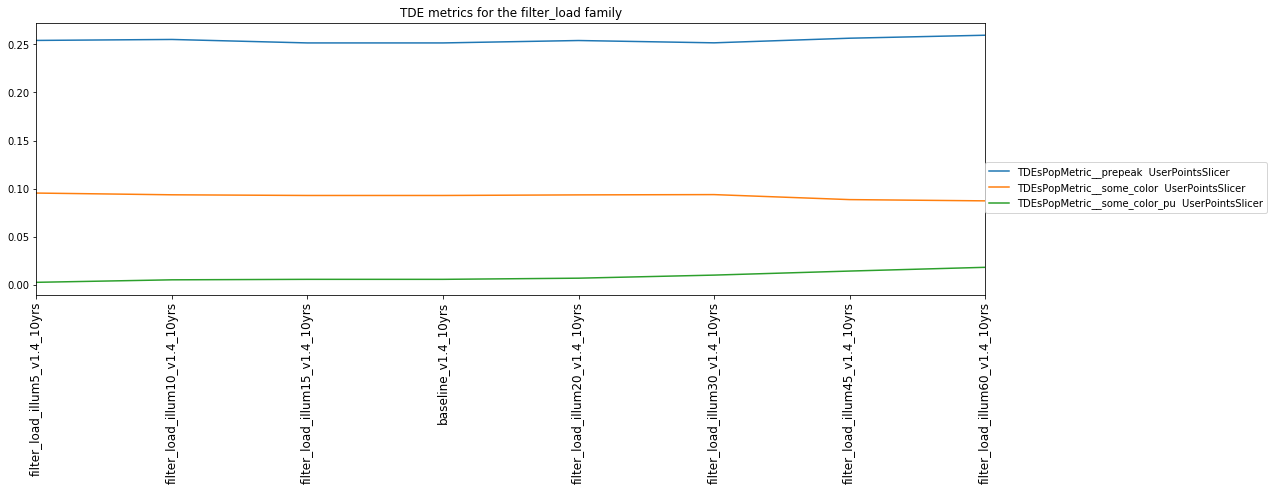

In [49]:
stats = sci['1.4'].loc[filter_load_family].sort_values(cols[-1])

stats[cols].plot(figsize=(17,5))
plt.legend(loc=(1, .3))
xnames = stats[cols].index.values
xi = np.arange(len(xnames))
plt.xticks(xi, xnames, rotation=90, fontsize='large')
plt.title(f'TDE metrics for the filter_load family')

Text(0.5, 1.0, 'Relative (% change) TDE metrics for the filter_load family')

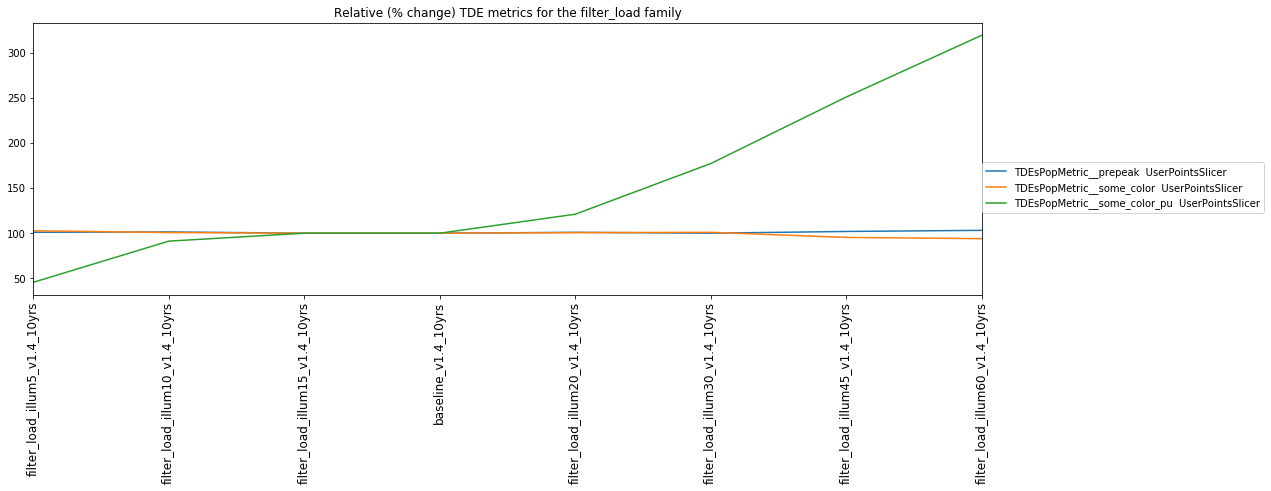

In [50]:
stats = sci['1.4'].loc[filter_load_family] / sci['1.4'].loc[filter_load_baseline] * 100
stats = stats.sort_values(cols[-1])

stats[cols].plot(figsize=(17,5))
plt.legend(loc=(1, .3))
xnames = stats[cols].index.values
xi = np.arange(len(xnames))
plt.xticks(xi, xnames, rotation=90, fontsize='large')
plt.title(f'Relative (% change) TDE metrics for the filter_load family')

In [52]:
# Also - 60 second u-band exposures look bad in either case. Most likely because there are then fewer u-band visits.